# **Tugas Kelompok Regresi**

> Indented block



**Deskripsi Singkat:** Kita akan membuat model regresi yang akan memprediksi kualitas tidur seseorang.

Dataset https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency

# **Setup**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/Sleep_Efficiency.csv"
df = pd.read_csv(path)
df_noid = df.iloc[:, 1:]

FileNotFoundError: ignored

# **Data Understanding**

Melihat jenis data tiap kolom

In [ ]:
print(df.dtypes)

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object


## Check Data

In [ ]:
df_noid.isnull().sum()

Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

Terdapat null pada Tabel 20 sebanyak 20, Caffeine consumption adalah 25, Alcohol consumption adalah 14

In [ ]:
df_noid.duplicated().sum()

0

Tidak ada data yang duplikat

In [ ]:
df_noid.head(10)

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
5,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
6,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0
7,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,0.90,28,52,20,0.0,50.0,0.0,Yes,3.0
8,41,Female,2021-04-05 02:30:00,2021-04-05 08:30:00,6.0,0.79,28,55,17,3.0,50.0,0.0,No,1.0
9,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,0.55,18,37,45,4.0,0.0,0.0,No,0.0


Contoh data 10 dari atas

# **Statistical Analysis**

In [ ]:
df_noid.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


Data Kategorikal

In [ ]:
df_obj = df_noid.select_dtypes(include='object')
for i in df_obj.columns:
  print(i, '\n', df_obj[i].value_counts(), '\n\n', sep='')

Gender
Male      228
Female    224
Name: Gender, dtype: int64


Bedtime
2021-03-11 01:00:00    3
2021-03-26 02:00:00    2
2021-12-29 00:00:00    2
2021-07-14 21:00:00    2
2021-07-11 21:00:00    2
                      ..
2021-09-10 23:00:00    1
2021-12-03 01:30:00    1
2021-04-21 21:30:00    1
2021-02-04 22:00:00    1
2021-03-17 02:30:00    1
Name: Bedtime, Length: 424, dtype: int64


Wakeup time
2021-11-25 06:00:00    2
2021-09-19 08:00:00    2
2021-03-26 09:00:00    2
2021-11-28 07:30:00    2
2021-07-29 04:00:00    2
                      ..
2021-02-27 05:00:00    1
2021-11-27 08:00:00    1
2021-09-10 07:00:00    1
2021-12-03 08:30:00    1
2021-03-17 10:00:00    1
Name: Wakeup time, Length: 434, dtype: int64


Smoking status
No     298
Yes    154
Name: Smoking status, dtype: int64




## Central Tendencies

In [ ]:
df_noid.columns

Index(['Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

Arithmetic Means

In [ ]:
df_noid[['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
       'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
       'Caffeine consumption', 'Alcohol consumption','Exercise frequency']].mean()

Age                       40.285398
Sleep duration             7.465708
Sleep efficiency           0.788916
REM sleep percentage      22.615044
Deep sleep percentage     52.823009
Light sleep percentage    24.561947
Awakenings                 1.641204
Caffeine consumption      23.653396
Alcohol consumption        1.173516
Exercise frequency         1.791480
dtype: float64

Median

In [ ]:
df_noid[['Age','Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
       'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
       'Caffeine consumption', 'Alcohol consumption','Exercise frequency']].median()

Age                       40.00
Sleep duration             7.50
Sleep efficiency           0.82
REM sleep percentage      22.00
Deep sleep percentage     58.00
Light sleep percentage    18.00
Awakenings                 1.00
Caffeine consumption      25.00
Alcohol consumption        0.00
Exercise frequency         2.00
dtype: float64

Modes

In [ ]:
df_noid[['Age']].mode()

,Age
0,27
1,52


In [ ]:
df_noid[['Gender']].mode()

,Gender
0,Male


In [ ]:
df_noid[['Sleep duration']].mode()

,Sleep duration
0,7.0


In [ ]:
df_noid[['Smoking status']].mode()

,Smoking status
0,No


## Distribution Representation

Range

In [ ]:
minAge = df_noid[['Age']].min()
maxAge = df_noid[['Age']].max()
print(maxAge-minAge)

Age    60
dtype: int64


In [ ]:
minSD = df_noid[['Sleep duration']].min()
maxSD = df_noid[['Sleep duration']].max()
print(maxSD-minSD)

Sleep duration    5.0
dtype: float64


In [ ]:
minSP = df_noid[['REM sleep percentage']].min()
maxSP = df_noid[['REM sleep percentage']].max()
print(maxSP-minSP)

REM sleep percentage    15
dtype: int64


In [ ]:
minDSP = df_noid[['Deep sleep percentage']].min()
maxDSP = df_noid[['Deep sleep percentage']].max()
print(maxDSP-minDSP)

Deep sleep percentage    57
dtype: int64


In [ ]:
minLSP = df_noid[['Light sleep percentage']].min()
maxLSP = df_noid[['Light sleep percentage']].max()
print(maxLSP-minLSP)

Light sleep percentage    56
dtype: int64


In [ ]:
minA = df_noid[['Awakenings']].min()
maxA = df_noid[['Awakenings']].max()
print(maxA-minA)

Awakenings    4.0
dtype: float64


Quantiles

In [ ]:
df_noid.quantile(0.25)

Age                       29.0000
Sleep duration             7.0000
Sleep efficiency           0.6975
REM sleep percentage      20.0000
Deep sleep percentage     48.2500
Light sleep percentage    15.0000
Awakenings                 1.0000
Caffeine consumption       0.0000
Alcohol consumption        0.0000
Exercise frequency         0.0000
Name: 0.25, dtype: float64

In [ ]:
df_noid.quantile(0.5)

Age                       40.00
Sleep duration             7.50
Sleep efficiency           0.82
REM sleep percentage      22.00
Deep sleep percentage     58.00
Light sleep percentage    18.00
Awakenings                 1.00
Caffeine consumption      25.00
Alcohol consumption        0.00
Exercise frequency         2.00
Name: 0.5, dtype: float64

In [ ]:
df_noid.quantile(0.75)

Age                       52.0
Sleep duration             8.0
Sleep efficiency           0.9
REM sleep percentage      25.0
Deep sleep percentage     63.0
Light sleep percentage    32.5
Awakenings                 3.0
Caffeine consumption      50.0
Alcohol consumption        2.0
Exercise frequency         3.0
Name: 0.75, dtype: float64

Standard Deviation and Variances

In [ ]:
df_noid.std()

Age                       13.172250
Sleep duration             0.866625
Sleep efficiency           0.135237
REM sleep percentage       3.525963
Deep sleep percentage     15.654235
Light sleep percentage    15.313665
Awakenings                 1.356762
Caffeine consumption      30.202785
Alcohol consumption        1.621377
Exercise frequency         1.428134
dtype: float64

In [ ]:
df_noid.var()

Age                       173.508168
Sleep duration              0.751039
Sleep efficiency            0.018289
REM sleep percentage       12.432412
Deep sleep percentage     245.055079
Light sleep percentage    234.508349
Awakenings                  1.840804
Caffeine consumption      912.208222
Alcohol consumption         2.628862
Exercise frequency          2.039568
dtype: float64

## Outliers

Using Tukey's Fence

In [ ]:
q1 = df_noid['Sleep duration'].quantile(0.25)
q3 = df_noid['Sleep duration'].quantile(0.75)
iqr = q3 - q1
iso = (df_noid['Sleep duration'] < q1 - 1.5*iqr) | (df_noid['Sleep duration'] > q3 + 1.5*iqr)
iseo = (df_noid['Sleep duration'] < q1 - 3*iqr) | (df_noid['Sleep duration'] > q3 + 3*iqr)
df1 = df_noid[['Sleep efficiency', 'Sleep duration']].assign(is_outlier = iso, is_extreme_outlier = iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,Sleep efficiency,Sleep duration,is_outlier,is_extreme_outlier
7,0.90,10.0,True,False
42,0.59,10.0,True,False
90,0.80,5.0,True,False
110,0.91,5.0,True,False
198,0.86,5.0,True,False
213,0.86,5.0,True,False
232,0.87,5.0,True,False
249,0.66,10.0,True,False
303,0.78,10.0,True,False
305,0.90,5.0,True,False


In [ ]:
q1 = df_noid['Deep sleep percentage'].quantile(0.25)
q3 = df_noid['Deep sleep percentage'].quantile(0.75)
iqr = q3 - q1
iso = (df_noid['Deep sleep percentage'] < q1 - 1.5*iqr) | (df_noid['Deep sleep percentage'] > q3 + 1.5*iqr)
iseo = (df_noid['Deep sleep percentage'] < q1 - 3*iqr) | (df_noid['Deep sleep percentage'] > q3 + 3*iqr)
df1 = df_noid[['Sleep efficiency', 'Deep sleep percentage']].assign(is_outlier = iso, is_extreme_outlier = iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,Sleep efficiency,Deep sleep percentage,is_outlier,is_extreme_outlier
3,0.51,25,True,False
6,0.54,25,True,False
13,0.64,25,True,False
16,0.54,22,True,False
17,0.50,20,True,False
28,0.65,20,True,False
30,0.57,20,True,False
32,0.55,23,True,False
35,0.64,22,True,False
39,0.63,23,True,False


In [ ]:
q1 = df_noid['Light sleep percentage'].quantile(0.25)
q3 = df_noid['Light sleep percentage'].quantile(0.75)
iqr = q3 - q1
iso = (df_noid['Light sleep percentage'] < q1 - 1.5*iqr) | (df_noid['Light sleep percentage'] > q3 + 1.5*iqr)
iseo = (df_noid['Light sleep percentage'] < q1 - 3*iqr) | (df_noid['Light sleep percentage'] > q3 + 3*iqr)
df1 = df_noid[['Sleep efficiency', 'Light sleep percentage']].assign(is_outlier = iso, is_extreme_outlier = iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,Sleep efficiency,Light sleep percentage,is_outlier,is_extreme_outlier
17,0.50,62,True,False
257,0.52,63,True,False


## Frequency Table

In [ ]:
df[['Age']].value_counts()

Age
27     19
52     19
37     18
40     17
29     17
       ..
14      1
13      1
12      1
11      1
69      1
Length: 61, dtype: int64

In [ ]:
df[['Gender']].value_counts()

Gender
Male      228
Female    224
dtype: int64

In [ ]:
df[['Caffeine consumption']].value_counts()

Caffeine consumption
0.0                     211
50.0                    107
25.0                     79
75.0                     25
200.0                     4
100.0                     1
dtype: int64

In [ ]:
df[['Alcohol consumption']].value_counts()

Alcohol consumption
0.0                    246
1.0                     54
3.0                     48
2.0                     37
5.0                     30
4.0                     23
dtype: int64

In [ ]:
df[['Smoking status']].value_counts()

Smoking status
No                298
Yes               154
dtype: int64

## Group Data

Group Gender and Sleep efficiency

In [ ]:
df_noid.groupby('Gender')[['Sleep efficiency']].mean().sort_values(by='Sleep efficiency', ascending=False)

,Sleep efficiency
Gender,
Male,0.790263
Female,0.787545


Group Age and Sleep efficiency

In [ ]:
df_noid.groupby('Age')[['Sleep efficiency']].mean().sort_values(by='Sleep efficiency', ascending=False)

,Sleep efficiency
Age,
66,0.880000
48,0.875882
47,0.868333
19,0.866667
35,0.865714
...,...
13,0.580000
12,0.560000
11,0.550000


Group Alcohol Consumption and Sleep Efficiency

In [ ]:
df_noid.groupby('Alcohol consumption')[['Sleep efficiency']].mean().sort_values(by='Sleep efficiency', ascending=False)

,Sleep efficiency
Alcohol consumption,
0.0,0.832033
1.0,0.803889
3.0,0.750417
5.0,0.692667
4.0,0.685217
2.0,0.671351


Group Caffeine Consumption and Sleep Efficiency

In [ ]:
df_noid.groupby('Caffeine consumption')[['Sleep efficiency']].mean().sort_values(by='Sleep efficiency', ascending=False)

,Sleep efficiency
Caffeine consumption,
100.0,0.900000
200.0,0.882500
75.0,0.845600
25.0,0.799114
0.0,0.786209
50.0,0.771589


Group Smoking status and Sleep Efficiency

In [ ]:
df_noid.groupby('Smoking status')[['Sleep efficiency']].mean().sort_values(by='Sleep efficiency', ascending=False)

,Sleep efficiency
Smoking status,
No,0.817081
Yes,0.734416


Group Exercise frequency and Sleep Efficiency

In [ ]:
df_noid.groupby('Exercise frequency')[['Sleep efficiency']].mean().sort_values(by='Sleep efficiency', ascending=False)

,Sleep efficiency
Exercise frequency,
4.0,0.881463
5.0,0.851250
2.0,0.810000
3.0,0.799154
1.0,0.774124
0.0,0.743879


## Correlation Analysis

In [ ]:
df_noid.loc[:, 'Sleep efficiency':].corr()

,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
Sleep efficiency,1.000000,0.062362,0.787335,-0.819204,-0.564979,0.065082,-0.389624,0.259563
REM sleep percentage,0.062362,1.000000,-0.208159,-0.017462,-0.025332,0.060037,-0.053258,0.031768
Deep sleep percentage,0.787335,-0.208159,1.000000,-0.974311,-0.308267,0.001742,-0.361731,0.179102
Light sleep percentage,-0.819204,-0.017462,-0.974311,1.000000,0.321218,-0.015593,0.380571,-0.190191
Awakenings,-0.564979,-0.025332,-0.308267,0.321218,1.000000,-0.108615,0.206090,-0.219578
Caffeine consumption,0.065082,0.060037,0.001742,-0.015593,-0.108615,1.000000,-0.123308,-0.068224
Alcohol consumption,-0.389624,-0.053258,-0.361731,0.380571,0.206090,-0.123308,1.000000,0.006934
Exercise frequency,0.259563,0.031768,0.179102,-0.190191,-0.219578,-0.068224,0.006934,1.000000


# **Visualization Methods**

In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [ ]:
num_col = ['Age','Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
           'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
           'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

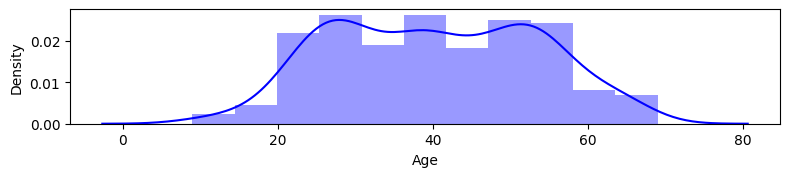

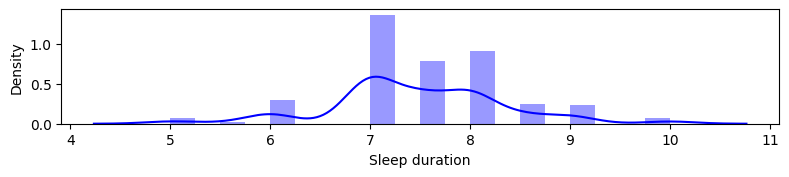

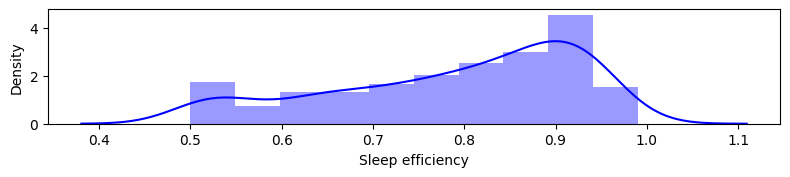

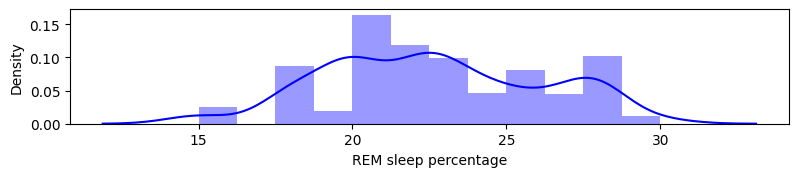

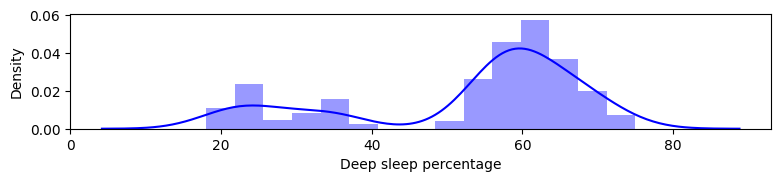

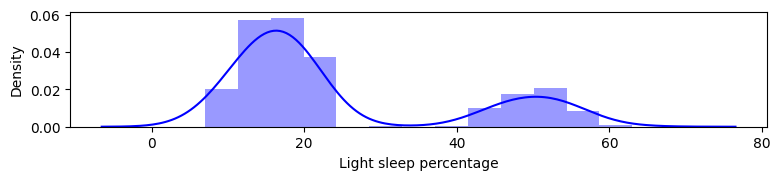

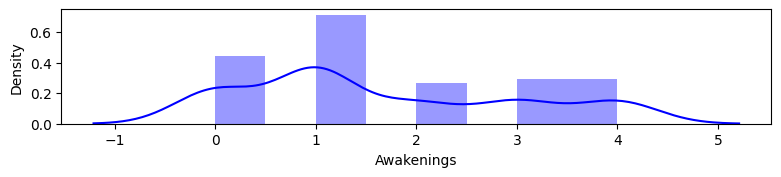

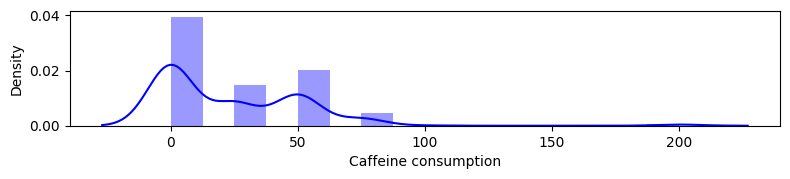

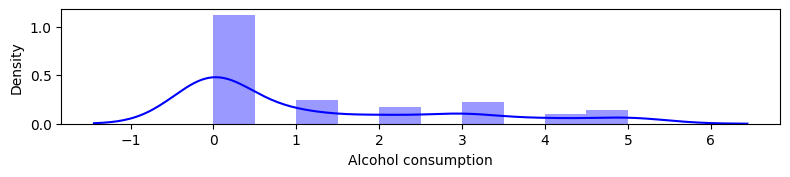

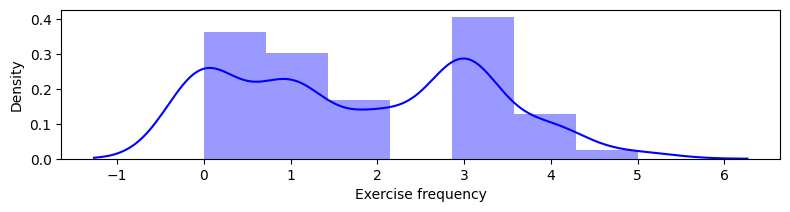

In [ ]:
# distribution plot

for i in range(0, len(num_col)):
    plt.figure(figsize=(8,17))
    plt.subplot(len(num_col),1,i+1)
    sns.distplot(df_noid[num_col[i]], color='blue')
    plt.tight_layout()

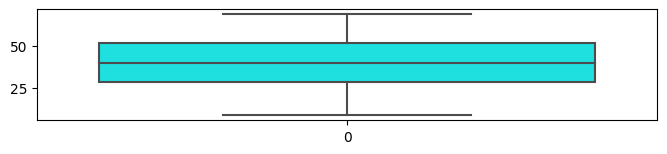

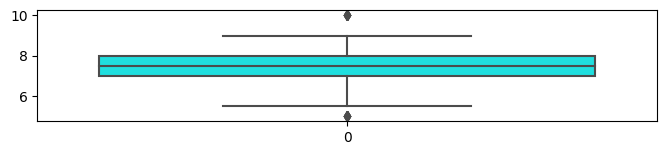

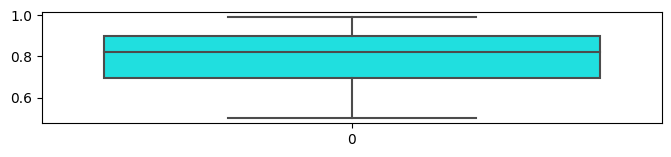

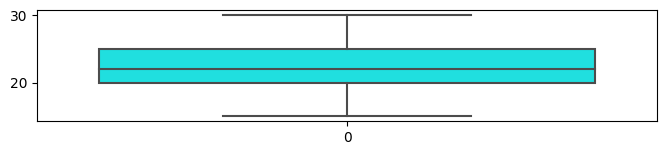

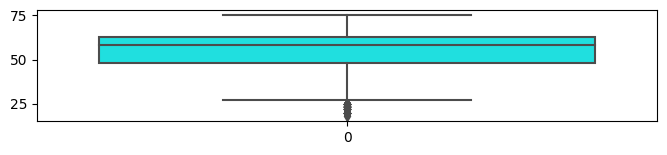

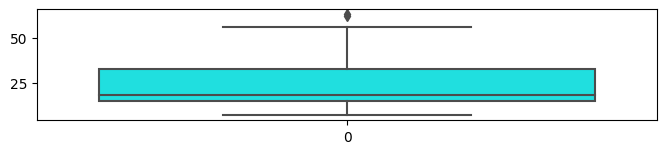

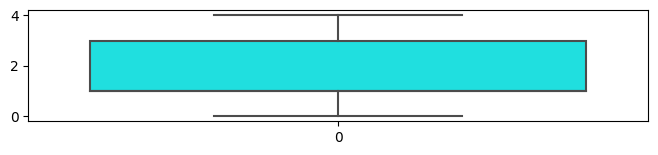

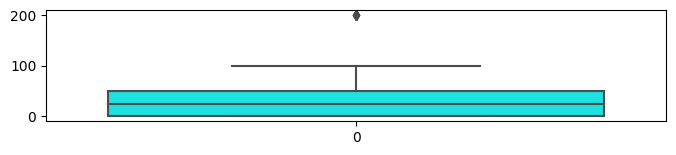

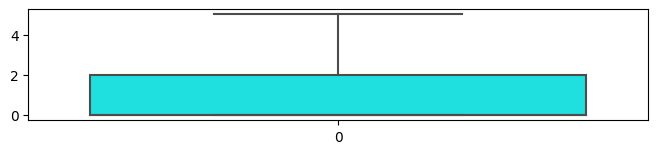

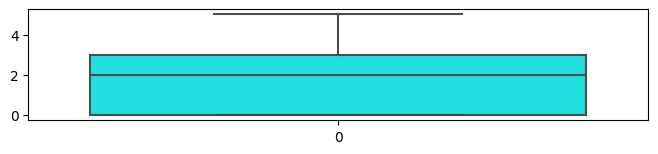

In [ ]:
# buat distribution plot/boxplot
for i in range(0, len(num_col)):
    plt.figure(figsize=(8,17))
    plt.subplot(len(num_col),1,i+1)
    sns.boxplot(df[num_col[i]], color='cyan', orient='v')

Korelasi

<Axes: >

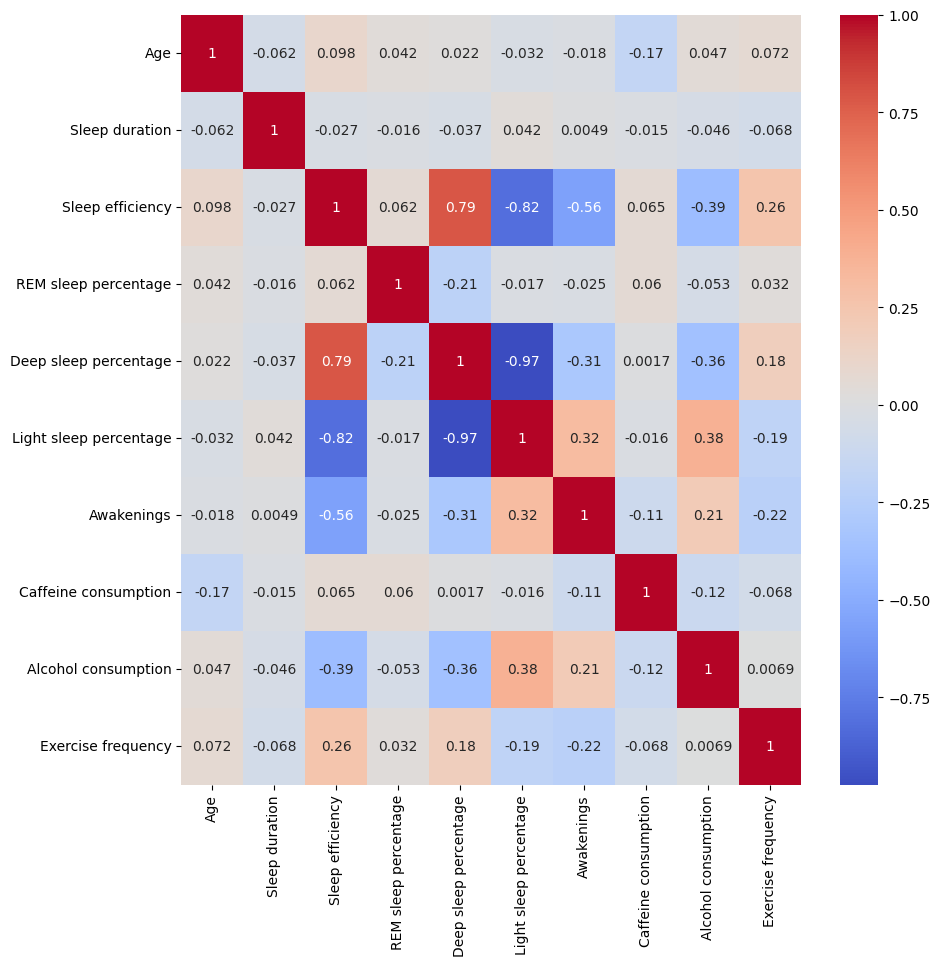

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_noid.corr(), annot=True, cmap='coolwarm')

Correlation with Sleep Efficiency

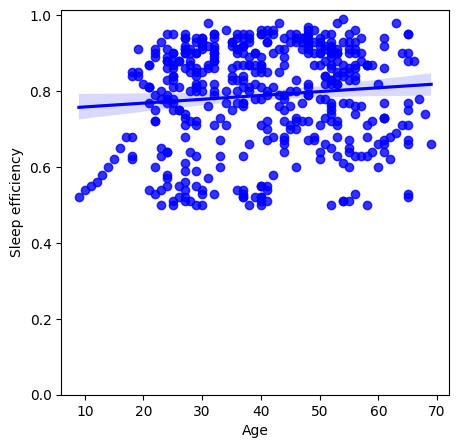

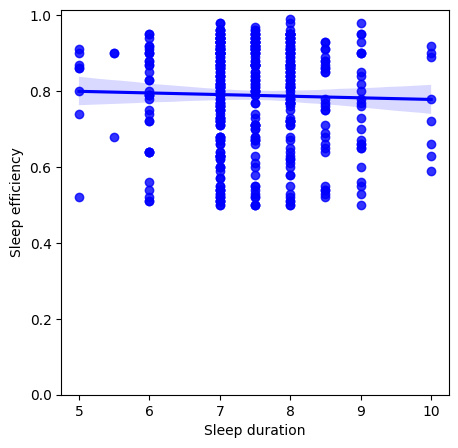

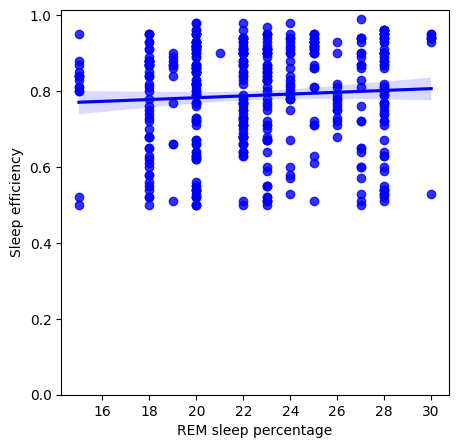

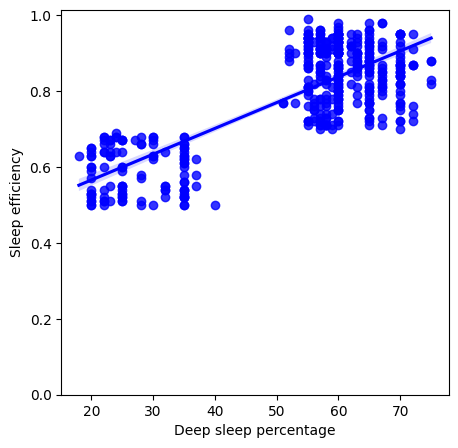

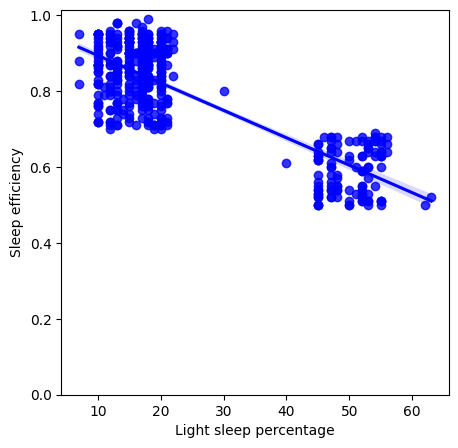

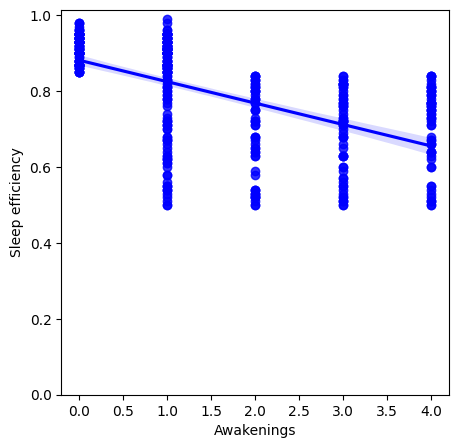

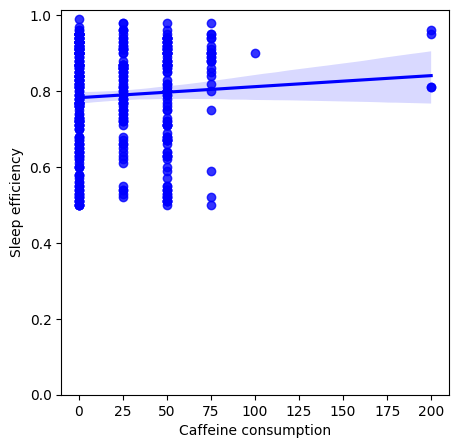

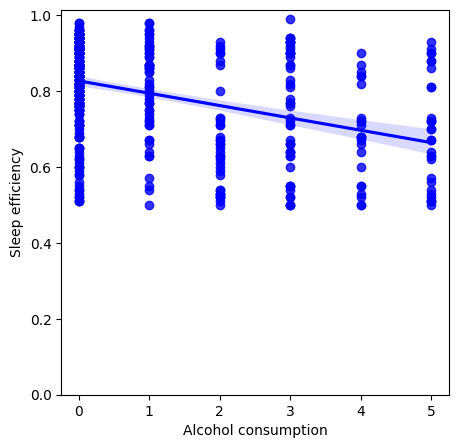

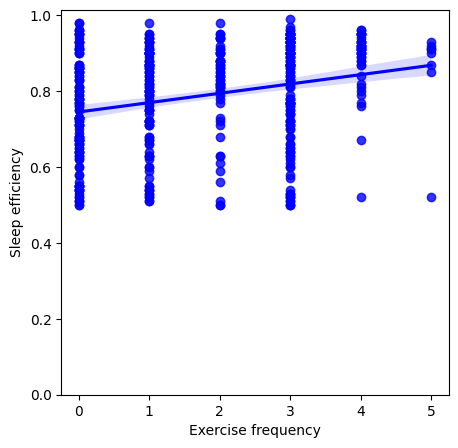

In [ ]:
for i in num_col:
  if i == "Sleep efficiency":
    continue
  plt.figure(figsize=(5,5))
  sns.regplot(x=i, y="Sleep efficiency", data=df_noid, color='blue')
  plt.ylim(0,)

# **Data Preparation**

## 1. Data Cleaning



### a. Remove/Drop unimportant columns in a DataFrame

Mari melihat kolom kita data apa saja tipe datanya untuk mengetahui kolom yang perlu dihapus.

In [ ]:
print(df.dtypes)

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object


Ternyata, tidak ada kolom yang perlu dihapus.

### b. Mengganti index
Mari melihat keunikan di DataFrame kita untuk mengetahui apakah perlu mengganti index atau tidak.

In [ ]:
df['ID'].is_unique

True

Ternyata semua data sudah unik sehingga tidak perlu mengganti index.

### c. Membersihkan kolom dalam data
Mari melihat data kita terlebih dahulu dan tipenya.

In [ ]:
print(df.dtypes)
print(df)

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object
      ID  Age  Gender              Bedtime          Wakeup time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
447  44

Mari merapikan data yang bertipe objek.

1) Gender

mari kita lakukan one-hot encoding untuk data kategorikal ini.

Catatan : karena kita akan mencoba banyak algoritma machine learning dan tugas ini tidak memerharikan komputasi sehingga memisahkan gender menjadi dua kolom merupakan 'cara aman' untuk semua algoritma machine learning.


In [ ]:
df_prep = pd.get_dummies(df, columns=['Gender'])
df_prep

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Gender_Female,Gender_Male
0,1,65,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1,0
1,2,69,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,0,1
2,3,40,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,1,0
3,4,40,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,1,0
4,5,57,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,1,0
448,449,52,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,0,1
449,450,40,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0,1,0
450,451,45,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0,0,1


2) Bed time dan wakeup time

Mari mengabaikan tanggal dan hanya fokus pada jam saja.
**Catatan penting : run cell dibawah hanya sekali.**

In [ ]:
df_prep["Bedtime"] = df_prep["Bedtime"].str.split(' ').str[1:].str.join(' ')
df_prep["Wakeup time"] = df_prep["Wakeup time"].str.split(' ').str[1:].str.join(' ')
df_prep

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Gender_Female,Gender_Male
0,1,65,01:00:00,07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1,0
1,2,69,02:00:00,09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,0,1
2,3,40,21:30:00,05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,1,0
3,4,40,02:30:00,08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,1,0
4,5,57,01:00:00,09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,22:00:00,05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,1,0
448,449,52,21:00:00,03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,0,1
449,450,40,23:00:00,07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0,1,0
450,451,45,21:00:00,04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0,0,1


Mari merubah jam tidur menjadi urutan (dikarenakan jam tidur pukul 22:00 sebenarnya kurang dari jam 01:00)

In [ ]:
df['Bedtime'] = df['Bedtime'].astype('category')
df['Wakeup time'] = df['Wakeup time'].astype('category')

print(df_prep['Bedtime'].unique())
print(df_prep['Wakeup time'].unique())

['01:00:00' '02:00:00' '21:30:00' '02:30:00' '21:00:00' '00:30:00'
 '22:30:00' '01:30:00' '22:00:00' '23:00:00' '00:00:00']
['07:00:00' '09:00:00' '05:30:00' '08:30:00' '04:30:00' '03:00:00'
 '10:30:00' '10:00:00' '06:00:00' '11:30:00' '09:30:00' '08:00:00'
 '06:30:00' '07:30:00' '05:00:00' '04:00:00' '03:30:00' '11:00:00'
 '12:30:00']


Dikarenakan hanya sedikit kategori mari kita hardcode saja.

In [ ]:
df_prep['Bedtime'] = df_prep['Bedtime'].replace({
    '21:00:00': float(0),
    '21:30:00': float(0.5),
    '22:00:00': float(1),
    '22:30:00': float(1.5),
    '23:00:00': float(2),
    '00:00:00': float(3),
    '00:30:00': float(3.5),
    '01:00:00': float(4),
    '01:30:00': float(4.5),
    '02:00:00': float(5),
    '02:30:00': float(5.5)
})
df_prep['Wakeup time'] = df_prep['Wakeup time'].replace({
    '03:00:00': float(0),
    '03:30:00': float(0.5),
    '04:00:00': float(1),
    '04:30:00': float(1.5),
    '05:00:00': float(2),
    '05:30:00': float(2.5),
    '06:00:00': float(3),
    '06:30:00': float(3.5),
    '07:00:00': float(4),
    '07:30:00': float(4.5),
    '08:00:00': float(5),
    '08:30:00': float(5.5),
    '09:00:00': float(6),
    '09:30:00': float(6.5),
    '10:00:00': float(7),
    '10:30:00': float(7.5),
    '11:00:00': float(8),
    '11:30:00': float(8.5),
    '12:30:00': float(9.5)
})
df_prep

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Gender_Female,Gender_Male
0,1,65,4.0,4.0,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1,0
1,2,69,5.0,6.0,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,0,1
2,3,40,0.5,2.5,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,1,0
3,4,40,5.5,5.5,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,1,0
4,5,57,4.0,6.0,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,1.0,2.5,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,1,0
448,449,52,0.0,0.0,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,0,1
449,450,40,2.0,4.5,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0,1,0
450,451,45,0.0,1.0,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0,0,1


In [ ]:
df_prep.corr()

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Female,Gender_Male
ID,1.000000,0.021310,-0.105919,-0.085037,0.014333,-0.025624,0.051636,-0.047300,0.036463,-0.056447,-0.059594,0.115352,0.024640,0.013124,-0.013124
Age,0.021310,1.000000,0.136799,0.090355,-0.062462,0.098357,0.042091,0.021730,-0.031905,-0.017789,-0.171460,0.047188,0.072308,-0.244468,0.244468
Bedtime,-0.105919,0.136799,1.000000,0.897138,0.077487,-0.140665,-0.079307,-0.091077,0.111363,0.101676,-0.004149,0.013824,-0.315825,-0.031442,0.031442
Wakeup time,-0.085037,0.090355,0.897138,1.000000,0.509939,-0.133537,-0.075489,-0.095111,0.114607,0.089699,-0.010122,-0.008605,-0.301527,-0.007466,0.007466
Sleep duration,0.014333,-0.062462,0.077487,0.509939,1.000000,-0.027467,-0.015940,-0.037304,0.041804,0.004939,-0.014802,-0.046243,-0.068272,0.044376,-0.044376
Sleep efficiency,-0.025624,0.098357,-0.140665,-0.133537,-0.027467,1.000000,0.062362,0.787335,-0.819204,-0.564979,0.065082,-0.389624,0.259563,-0.010062,0.010062
REM sleep percentage,0.051636,0.042091,-0.079307,-0.075489,-0.015940,0.062362,1.000000,-0.208159,-0.017462,-0.025332,0.060037,-0.053258,0.031768,0.161102,-0.161102
Deep sleep percentage,-0.047300,0.021730,-0.091077,-0.095111,-0.037304,0.787335,-0.208159,1.000000,-0.974311,-0.308267,0.001742,-0.361731,0.179102,-0.075939,0.075939
Light sleep percentage,0.036463,-0.031905,0.111363,0.114607,0.041804,-0.819204,-0.017462,-0.974311,1.000000,0.321218,-0.015593,0.380571,-0.190191,0.040534,-0.040534
Awakenings,-0.056447,-0.017789,0.101676,0.089699,0.004939,-0.564979,-0.025332,-0.308267,0.321218,1.000000,-0.108615,0.206090,-0.219578,-0.075903,0.075903


3) Smoking status

mari kita lakukan one-hot encoding untuk data kategorikal ini.

Catatan : karena kita akan mencoba banyak algoritma machine learning dan tugas ini tidak memerharikan komputasi sehingga memisahkan 'smoking status' menjadi dua kolom merupakan 'cara aman' untuk semua algoritma machine learning.


In [ ]:
df_prep = pd.get_dummies(df_prep, columns=['Smoking status'])
df_prep

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Female,Gender_Male,Smoking status_No,Smoking status_Yes
0,1,65,4.0,4.0,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,1,0,0,1
1,2,69,5.0,6.0,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,0,1,0,1
2,3,40,0.5,2.5,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,1,0,1,0
3,4,40,5.5,5.5,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,1,0,0,1
4,5,57,4.0,6.0,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,1.0,2.5,7.5,0.91,22,57,21,0.0,0.0,0.0,5.0,1,0,1,0
448,449,52,0.0,0.0,6.0,0.74,28,57,15,4.0,25.0,0.0,3.0,0,1,1,0
449,450,40,2.0,4.5,8.5,0.55,20,32,48,1.0,NaN,3.0,0.0,1,0,0,1
450,451,45,0.0,1.0,7.0,0.76,18,72,10,3.0,0.0,0.0,3.0,0,1,1,0


In [ ]:
print(df_prep.dtypes)

ID                          int64
Age                         int64
Bedtime                   float64
Wakeup time               float64
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Exercise frequency        float64
Gender_Female               uint8
Gender_Male                 uint8
Smoking status_No           uint8
Smoking status_Yes          uint8
dtype: object


**Sekarang data kita sudah bersih!**

## 2. Imputasi
Mari melihat data apa saja yang hilang.

In [ ]:
df_prep.isnull().sum()

ID                         0
Age                        0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Exercise frequency         6
Gender_Female              0
Gender_Male                0
Smoking status_No          0
Smoking status_Yes         0
dtype: int64

Dapat kita lihat data yang hilang berada di kolom 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', dan 'exercise frequency'.

Mari melakukan imputasi dengan teknik **Imputasi Mean**.


In [ ]:
df_prep.fillna(df_prep.mean(), inplace=True)

In [ ]:
df_prep.isnull().sum()

ID                        0
Age                       0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Exercise frequency        0
Gender_Female             0
Gender_Male               0
Smoking status_No         0
Smoking status_Yes        0
dtype: int64

**Sekarang sudah tidak ada yang bernilai null!**

## 3. Menangani Outlier
Sebelum itu, mari melihat distribusi normal untuk kolom-kolom yang non binner.

In [ ]:
num_col = ['Age','Bedtime', 'Wakeup time','Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
           'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
           'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

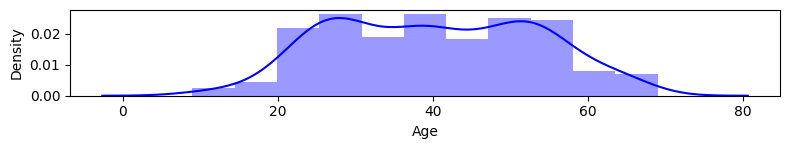

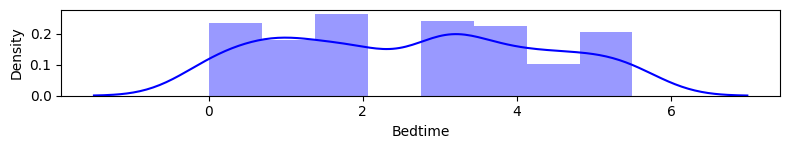

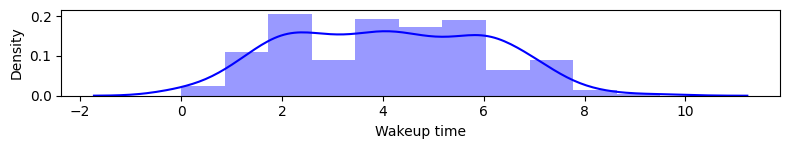

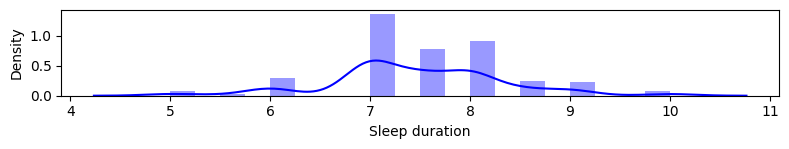

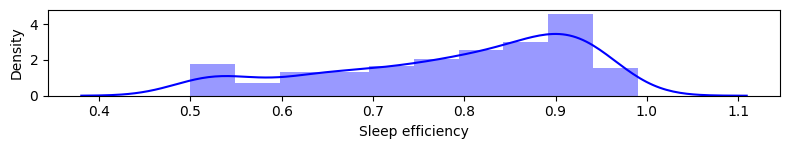

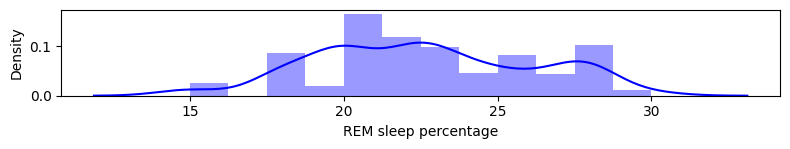

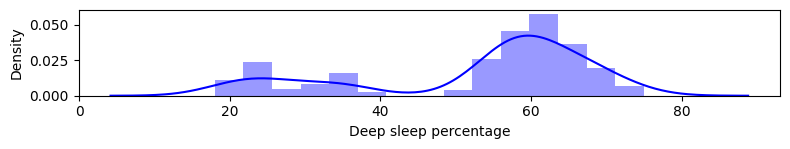

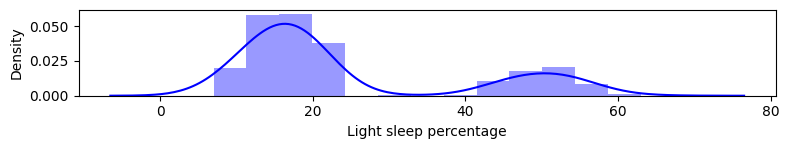

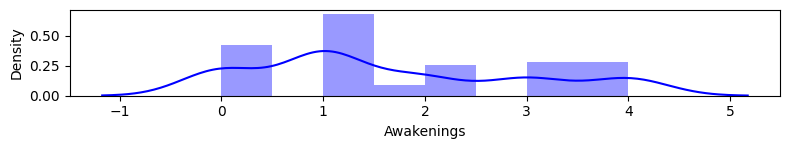

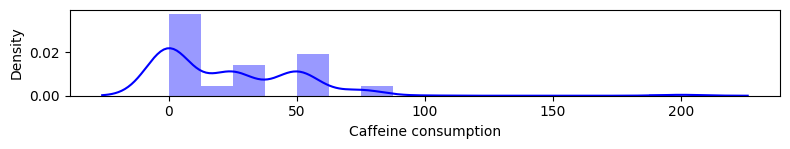

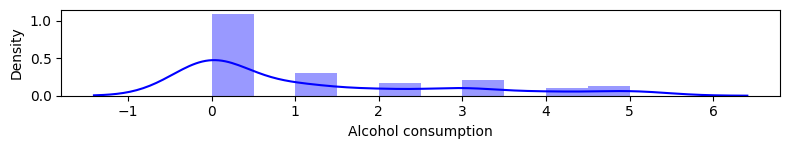

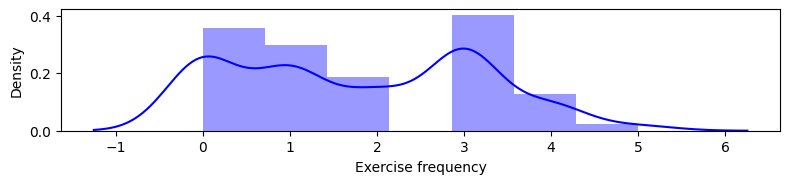

In [ ]:
# distribution plot

for i in range(0, len(num_col)):
    plt.figure(figsize=(8,17))
    plt.subplot(len(num_col),1,i+1)
    sns.distplot(df_prep[num_col[i]], color='blue')
    plt.tight_layout()

In [ ]:
from scipy.stats.mstats import winsorize

# Convert the DataFrame to a numpy array and winsorize to remove outliers
df_array = df_prep.to_numpy()
wins = winsorize(df_array, limits=[0.1, 0.1])

# Convert the winsorized data back to a pandas DataFrame
df_prep = pd.DataFrame(wins, columns=df_prep.columns)


In [ ]:
df_prep

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Female,Gender_Male,Smoking status_No,Smoking status_Yes
0,1.0,56.0,4.0,4.0,6.0,0.88,18.0,56.0,12.0,0.0,0.000000,0.0,3.0,1.0,0.0,0.0,1.0
1,2.0,56.0,5.0,6.0,7.0,0.66,19.0,28.0,53.0,3.0,0.000000,3.0,3.0,0.0,1.0,0.0,1.0
2,3.0,40.0,0.5,2.5,8.0,0.89,20.0,56.0,10.0,1.0,0.000000,0.0,3.0,1.0,0.0,1.0,0.0
3,4.0,40.0,5.5,5.5,6.0,0.51,23.0,25.0,52.0,3.0,50.000000,5.0,1.0,1.0,0.0,0.0,1.0
4,5.0,56.0,4.0,6.0,8.0,0.76,27.0,55.0,18.0,3.0,0.000000,3.0,3.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,56.0,27.0,1.0,2.5,7.5,0.91,22.0,56.0,21.0,0.0,0.000000,0.0,5.0,1.0,0.0,1.0,0.0
448,56.0,52.0,0.0,0.0,6.0,0.74,28.0,56.0,15.0,4.0,25.000000,0.0,3.0,0.0,1.0,1.0,0.0
449,56.0,40.0,2.0,4.5,8.5,0.55,20.0,32.0,48.0,1.0,23.653396,3.0,0.0,1.0,0.0,0.0,1.0
450,56.0,45.0,0.0,1.0,7.0,0.76,18.0,56.0,10.0,3.0,0.000000,0.0,3.0,0.0,1.0,1.0,0.0


## 4. Penskalaan (Scaling)
Kami akan memilih metode penskalaan **Normalisasi** dikarenakan data kami *feature-feature*-nya memiliki perbedaan yang jauh. Contoh : ratusan pada 'caffeine consumption' dan kurang dari sepuluh pada 'exercise frequency. Selain itu, Dikarenakan distribusi data yang tidak normal dan memiliki outlier yang tinggi. Terakhir, kami memilik normalisasi karena nilai absolut dari *feature* tidak sepenting nilai relatifnya.

In [ ]:
train_scaled = (df_prep - df_prep.min()) / (df_prep.max() - df_prep.min())


In [ ]:
df_prep = train_scaled
print(df_prep.dtypes)

ID                        float64
Age                       float64
Bedtime                   float64
Wakeup time               float64
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage      float64
Deep sleep percentage     float64
Light sleep percentage    float64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Exercise frequency        float64
Gender_Female             float64
Gender_Male               float64
Smoking status_No         float64
Smoking status_Yes        float64
dtype: object


## 5. Pemilihan Fitur (Feature Selection)

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = df_prep.iloc[:, [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]  # independent columns
y = df_prep.iloc[:, 5]
y=y.astype('int')  # target column, i.e., price range

# apply SelectKBest class to extract
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                   Specs     Score
9    Alcohol consumption  0.569816
11         Gender_Female  0.496674
12           Gender_Male  0.487960
8   Caffeine consumption  0.379963
14    Smoking status_Yes  0.341463
13     Smoking status_No  0.176461
4   REM sleep percentage  0.168705
10    Exercise frequency  0.163413
0                    Age  0.142709
1                Bedtime  0.128598
2            Wakeup time  0.092675
7             Awakenings  0.062767


In [ ]:
df_prep

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Female,Gender_Male,Smoking status_No,Smoking status_Yes
0,0.000000,1.000000,0.727273,0.421053,0.2,0.775510,0.200000,1.000000,0.102041,0.00,0.000000,0.0,0.6,1.0,0.0,0.0,1.0
1,0.018182,1.000000,0.909091,0.631579,0.4,0.326531,0.266667,0.263158,0.938776,0.75,0.000000,0.6,0.6,0.0,1.0,0.0,1.0
2,0.036364,0.659574,0.090909,0.263158,0.6,0.795918,0.333333,1.000000,0.061224,0.25,0.000000,0.0,0.6,1.0,0.0,1.0,0.0
3,0.054545,0.659574,1.000000,0.578947,0.2,0.020408,0.533333,0.184211,0.918367,0.75,0.892857,1.0,0.2,1.0,0.0,0.0,1.0
4,0.072727,1.000000,0.727273,0.631579,0.6,0.530612,0.800000,0.973684,0.224490,0.75,0.000000,0.6,0.6,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1.000000,0.382979,0.181818,0.263158,0.5,0.836735,0.466667,1.000000,0.285714,0.00,0.000000,0.0,1.0,1.0,0.0,1.0,0.0
448,1.000000,0.914894,0.000000,0.000000,0.2,0.489796,0.866667,1.000000,0.163265,1.00,0.446429,0.0,0.6,0.0,1.0,1.0,0.0
449,1.000000,0.659574,0.363636,0.473684,0.7,0.102041,0.333333,0.368421,0.836735,0.25,0.422382,0.6,0.0,1.0,0.0,0.0,1.0
450,1.000000,0.765957,0.000000,0.105263,0.4,0.530612,0.200000,1.000000,0.061224,0.75,0.000000,0.0,0.6,0.0,1.0,1.0,0.0


In [ ]:
# Memilih data
df_prep = df_prep.loc[:, ["Alcohol consumption", "Gender_Female", "Gender_Male", "Smoking status_Yes", "REM sleep percentage", "Exercise frequency", "Bedtime", "Caffeine consumption", "Age", "Wakeup time", "Awakenings", "Sleep efficiency"]]

# **Model**


### Preparation

In [ ]:
X = df_prep.iloc[:,0:8].values
y = df_prep.iloc[:, 9].values

In [ ]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

## **1. Random Forest**

### a. Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
rf_y_pred = rf.predict(X_test)

### b. Evaluation

In [ ]:
# Calculate evaluation metrics on the test set
mae = mean_absolute_error(y_test, rf_y_pred)
mse = mean_squared_error(y_test, rf_y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (test set):", mae)
print("Mean Squared Error (test set):", mse)
print("Root Mean Squared Error (test set):", rmse)
print("R2-score (test set):", r2_score(y_test, rf_y_pred))

Mean Absolute Error (test set): 0.06717302935160084
Mean Squared Error (test set): 0.008857740910220317
Root Mean Squared Error (test set): 0.0941155720920843
R2-score (test set): 0.797342044018996


###c. Tuning

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid_rf, cv=5, scoring='r2')
grid_search.fit(X_val, y_val)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

best_model = grid_search.best_estimator_

rf_y_pred = best_model.predict(X_test)

print("Explained variance:", explained_variance_score(y_test, rf_y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, rf_y_pred))
print("R2 score:", r2_score(y_test, rf_y_pred))


Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.7470466450036086
Explained variance: 0.8265831963621872
Mean absolute error: 0.0668829654716339
R2 score: 0.8163259946273792


## **2. Linear Regression**

###a. Training

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

lr_y_pred = regr.predict(X_test)

###b. Evaluasi

In [ ]:
mae = mean_absolute_error(y_test, lr_y_pred)
mse = mean_squared_error(y_test, lr_y_pred)
rmse = np.sqrt(mse)

print("Mean absolute error: ", mae)
print("Residual sum of squares (MSE): ", mse)
print("Root MSE: ", rmse)
print("R2-score: ", r2_score(y_test, lr_y_pred))

Mean absolute error:  0.06674683711846868
Residual sum of squares (MSE):  0.00785104990198514
Root MSE:  0.0886061504749255
R2-score:  0.8203743209958492


###c. Tuning

In [ ]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
param_grid_lr = {'fit_intercept': [True, False], 'copy_X': [True, False]}

model = LinearRegression()
lr_grid_search = GridSearchCV(model, param_grid_lr, cv=5, scoring='r2')
lr_grid_search.fit(X_val, y_val)

print('Best parameters:', lr_grid_search.best_params_)
print('Best score:', lr_grid_search.best_score_)

lr_best_model = lr_grid_search.best_estimator_

lr_y_pred = lr_best_model.predict(X_test)

print("Explained variance:", explained_variance_score(y_test, lr_y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, lr_y_pred))
print("R2 score:", r2_score(y_test, lr_y_pred))

Best parameters: {'copy_X': True, 'fit_intercept': False}
Best score: 0.7491186727304389
Explained variance: 0.8236312081854928
Mean absolute error: 0.0662221745730704
R2 score: 0.8141114551026016


## **3. Support Vector Machine**

###a. Normalisasi dan Scale data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test = sc_y.transform(y_test.reshape(-1, 1))

###b. Pembuatan Model

In [ ]:
# Fitting SVR to the dataset
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

###c. Prediksi nilai dengan model yang telah digunakan

In [ ]:
v_y_pred = regressor.predict(X_test)
v_y_pred = sc_y.inverse_transform(v_y_pred.reshape(-1,1))
print(v_y_pred)

[[0.14414199]
 [0.67706536]
 [0.25410603]
 [0.6084541 ]
 [0.77130761]
 [0.48414288]
 [0.31352707]
 [0.59201562]
 [0.57429017]
 [0.47168884]
 [0.16881381]
 [0.21224642]
 [0.24830787]
 [0.24052932]
 [0.76844381]
 [0.25528606]
 [0.66931292]
 [0.2020484 ]
 [0.36256454]
 [0.71940634]
 [0.68841401]
 [0.22752168]
 [0.47840947]
 [0.15213826]
 [0.29795741]
 [0.57429017]
 [0.77700665]
 [0.61809131]
 [0.6084541 ]
 [0.29132532]
 [0.21102575]
 [0.56658254]
 [0.23569757]
 [0.65706023]
 [0.46696744]
 [0.12611601]
 [0.76187531]
 [0.07737301]
 [0.71026845]
 [0.25121226]
 [0.70299359]
 [0.77496976]
 [0.43077812]
 [0.77010918]
 [0.17898411]
 [0.5251119 ]
 [0.73617613]
 [0.77496976]
 [0.35441725]
 [0.55744464]
 [0.32369102]
 [0.5295143 ]
 [0.25749703]
 [0.56047185]
 [0.37810784]
 [0.20050613]
 [0.31352707]
 [0.62656605]
 [0.22705729]
 [0.35217961]
 [0.21570948]
 [0.62690045]
 [0.52274075]
 [0.22752168]
 [0.36221577]
 [0.56047185]
 [0.47089928]
 [0.76927072]
 [0.54101261]
 [0.50475381]
 [0.12858609]
 [0.26

###d. Evaluasi

In [ ]:
test_x = np.asanyarray(X)
test_y = np.asanyarray(y)
test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_x)).reshape(-1,1))

print("Mean absolute error: ", np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): ", np.mean((test_y_ - test_y) ** 2))
print("R2-score: ", r2_score(test_y_ , test_y) )

Mean absolute error:  0.2315508156020219
Residual sum of squares (MSE):  0.08091463505194027
R2-score:  0.7791777463269256


###e. Tuning

In [ ]:
param_grid_svm = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}

model = SVR(kernel = "linear")
grid_search = GridSearchCV(model, param_grid_svm, cv=5, scoring='r2')
grid_search.fit(X_val, y_val)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Explained variance:", explained_variance_score(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

Best parameters: {'C': 10, 'epsilon': 0.01}
Best score: 0.7421956294164052
Explained variance: 0.7503233330547483
Mean absolute error: 0.4084461584905685
R2 score: 0.7450161134530232


## Tuning

###Tanpa GridSearchV

Tuning dilakukan untuk beberapa model sekaligus.

In [ ]:
%matplotlib inline

#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(df_prep[['Alcohol consumption', 'Smoking status_Yes', 'REM sleep percentage', 'Exercise frequency', 'Bedtime', 'Caffeine consumption', 'Age', 'Wakeup time', 'Awakenings']])
y = df_prep[['Sleep efficiency']]

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_sc, y, test_size=0.2, random_state=42)

from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

from time import time

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

regressors = [
    RandomForestRegressor(),
    LinearRegression(),
    SVR(kernel='linear')
]

head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_val, y_val)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

RandomForestRegressor()
	Training time: 0.157s
	Prediction time: 0.009s
	Explained variance: 0.9242899291849195
	Mean absolute error: 0.0559071540704194
	R2 score: 0.9241156921107149

LinearRegression()
	Training time: 0.004s
	Prediction time: 0.000s
	Explained variance: 0.5763936196584591
	Mean absolute error: 0.14099524367989513
	R2 score: 0.5763936196584591

SVR(kernel='linear')
	Training time: 0.009s
	Prediction time: 0.001s
	Explained variance: 0.570302246794645
	Mean absolute error: 0.1406836662099313
	R2 score: 0.5698262563238882



# **Kesimpulan**

Random Forest Regression menampilkan akurasi (berdasarkan skor R2) paling baik dapat disebabkan oleh hubungan input feature dan target yang non-linear, data berdimensi tinggi, dan dapat mencegah overfitting. Akan tetapi model ini memiliki waktu train dan prediksi yang lama.